
# Migle  Kasetaite - Student id : 21-733-779

# Nidhi Agrawal - Student id : 21-717-673


# Practical 2 : Generative and Discriminative Models


In this practical, we will compare the Naïve Bayes Classifier (NBC) and Logistic Regression on several
datasets. As part of the practical you should read briefly the following paper:



**On Discriminative vs. Generative classifiers: A comparison of logistic regression
and naive Bayes**  
*Andrew Y. Ng and Michael I. Jordan*  
Advances in Neural Information Processing Systems (NIPS) 2001.

The paper is available on OLAT. 

You should read the Introduction and the Experiments sections. The goal of this practical is
to qualitatively reproduce some of the experimental results in this paper. You are strongly
encouraged to read the rest of the paper, which is rather short and straightforward to read,
though some of you may want to skip the formal proofs.

## Naïve Bayes Classifier (NBC)

You should implement a Naïve Bayes Classifier from scartch using NumPy. To keep your code tidy,
we recommend implementing it as a class. 
The classifier should be able to handle binary and continuous features. 
To earn the bonus points, the classifier should be able to handle categorical features as well. 
Suppose the data has 3
different features, the first being binary, the second being continuous and the third being categorical. Write an implementation that you can initialise as follows:

    nbc = NBC(feature_types=['b', 'r', 'c'])

Along the lines of classifiers provided in sklearn, you want to implement two more functions,
**fit** and **predict**. 
Recall the joint distribution of a generative model: $p(\mathbf{x}, y \mid \theta, \pi) = p(y \mid \pi) \cdot p(\mathbf{x} \mid y, \theta)$.
The **fit** function is to estimate all the parameters ($\theta$ and $\pi$) of the NBC, i.e., train the classifier. The **predict** function is to compute the probabilities that the new input belongs to all classes and
then return the class that has the largest probability, i.e., make the prediction.

    nbc.fit(X_train, y_train)
    ypredicted = nbc.predict(X_test)
    test_accuracy = np.mean(ypredicted == ytest)

Here we import the libraries. 

In [1]:
%matplotlib inline
import pylab
pylab.rcParams['figure.figsize'] = (10., 10.)

import pickle as cp
import matplotlib.pyplot as plt
import numpy as np

import scipy.stats as ss

### Class-conditional distributions

Before implementing NBC, we first implement the class-conditional distributions $p(\mathbf{x} \mid y, \theta)$. Your implementation should have two functions: **estimate** and **get_log_probability**. 

- The **estimate** function takes data as input and models the data using some distribution $p(x \mid \theta)$, where $\theta$ is the parameters of this distribution. The function estimates the parameters $\theta$ using maximum likelihood estimators (MLE). 
For example, in the case of continuous features, we use the Gaussian distribution to model the data. The estimate function will find the parameters $\mu$ and $\sigma$ for the Gaussian distribution with respect to the input data. 

- The **get_log_probability** function takes as input a new data point $x_{new}$ and returns the log of $p(x_{new} \mid \theta)$. For the Gaussian distribution, the function get_probability will return $\mathcal{N}(x_{new} \mid \mu, \sigma)$. 

For different types of features, you need to use different distributions.
You can import statistic libraries (e.g., `scipy.stats`) for the implementation of the distributions. 

- For **continuous features**: Use Gaussian distribution
    https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
- For **binary features**: Use Bernoulli distribution 
    https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html
- For **categorical features**: Use Multinoulli distribution (The multinoulli distribution is a special case of the multinomial distribution, where the number of trials is 1)
    https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.multinomial.html



**Implementation Issues:**
- The probabilities can be very small. To avoid underflow issues, you should compute the log of the probabilities. Read more: (Mur) Chapter 3.5.3 / Lecture Notes
- The variance for Gaussian distributions should never be exactly 0, so in
case your calculated variance is 0, you may want to set it to a small value such as 1e − 6. This is to ensure that your code never encounters division by zero or
taking logarithms of 0 errors. 
For this practical, please set the small value to 1e-6.
- Laplace/Additive smoothing: You want to ensure that the estimates for the parameter for the Bernoulli and Multinoulli random variables is never exactly 0 or 1. For this reason you should consider using Laplace smoothing (https://en.wikipedia.org/wiki/Additive_smoothing).
For this practical, please set alpha to 1.
- We will check the correctness of your implementation using the tests below.
- For simplicity, you can assume the data values for binary features are integers from {0,1} and the data for a categorical feature with M categories are integers from {0, ..., M-1}.
- Fell free to add auxiliary functions or change the parameters of the functions. If you change the parameters of the functions, make sure you change the tests accordingly, so we can test your code.


In [2]:
ALPHA = 1.0 # for additive smoothing

# Distribution for continuous features
class ContFeatureParam:
    def estimate(self, X):
        # TODO: Estimate the parameters for the Gaussian distribution 
        # so that it best describes the input data X
        # The code below is just for compilation. 
        # You need to replace it by your own code.
        ###################################################
        ##### OUR CODE STARTS HERE #######################
        ###################################################
        
        # calculate the mean and standard deviation of train dataset (X)
        self.mean, self.std = ss.norm.fit(X)
        
        # if standard deviation is 0, set it to e**(-6)
        if self.std == 0: self.std = np.sqrt(np.exp(-6))
     
        
        ###################################################
        ##### OUR CODE ENDS HERE #########################
        ###################################################

    def get_log_probability(self, X_new):
        # TODO: return the log of the density values for the input values X_new
        # The code below is just for compilation. 
        # You need to replace it by your own code.
        ###################################################
        ##### OUR CODE STARTS HERE #######################
        ###################################################
        
        # calculate the log of probability distribution of test dataset (X_new)
        prob = ss.norm.logpdf(X_new, loc=self.mean, scale = self.std)
        
        return prob
        
        
        ###################################################
        ##### OUR CODE ENDS HERE #########################
        ###################################################

# Distribution for binary features
class BinFeatureParam:
    def estimate(self, X):
        # TODO: Estimate the parameters for the Bernoulli distribution 
        # so that it best describes the input data X
        # The code below is just for compilation. 
        # You need to replace it by your own code.
        ###################################################
        ##### OUR CODE STARTS HERE #######################
        ###################################################
        # X is a vector with binary values
        
        
        # Determine classes (0,1 for binary) and number of data items in each class for train dataset (X)
        
        self.cat = [0, 1]
        self.counts = [X.tolist().count(0), X.tolist().count(1)]

        # Applying laplace smoothing while calculating probability for success P(1)        
        self.p = (self.counts[1] + ALPHA)/(len(X) + (len(self.cat)*ALPHA))

        
        
        ###################################################
        ##### OUR CODE ENDS HERE #########################
        ###################################################

        
    def get_log_probability(self, X_new):
        # TODO: return the log of the probability values for the input values X_new
        # The code below is just for compilation. 
        # You need to replace it by your own code.
        ###################################################
        ##### OUR CODE STARTS HERE #######################
        ###################################################
        
    
        # calculate the log of probability distribution of test dataset (X_new)    
        self.prob = ss.bernoulli.logpmf(X_new, self.p)
        
        return self.prob
    
    
        ###################################################
        ##### OUR CODE ENDS HERE #########################
        ###################################################

# Distribution for categorical features
class CatFeatureParam:
    
    # we need to know the number of categories for the categorical feature
    def __init__(self, num_of_categories=0):
        self._num_of_categories = num_of_categories
        
    
    def estimate(self, X):
        # TODO: Estimate the parameters for the Multinoulli distribution 
        # so that it best describes the input data X
        # The code below is just for compilation. 
        # You need to replace it by your own code.
        ###################################################
        ##### OUR CODE STARTS HERE #######################
        ###################################################
        
        
        # initialize a dictionary
        self.prob = {}

        # Given: Data values for a categorical feature with M categories are integers from 0 to M-1
        for cat in range (self._num_of_categories):
            
            # Apply laplace smoothing while calculating probability
            self.prob[cat] = (X.tolist().count(cat) + ALPHA)/(len(X) + (self._num_of_categories*ALPHA))
        
        # list of all probabilities
        self.p=list(self.prob.values())

        
        
        ###################################################
        ##### OUR CODE ENDS HERE #########################
        ###################################################
        
    def get_log_probability(self, X_new):
        # TODO: return the log of the probability values for the input values X_new
        # The code below is just for compilation. 
        # You need to replace it by your own code.
        ###################################################
        ##### OUR CODE STARTS HERE #######################
        ###################################################
        
        
        # create a matrix of zeros
        X_test = np.zeros((len(X_new), self._num_of_categories))
        
        # One hot encoding the categorical values in X_new
        for x in range(len(X_new)): X_test[x, X_new[x]] = 1
        
        # calculate log of the probability values for the test dataset X_new
        prob = ss.multinomial.logpmf(X_test.tolist(), n=len(X_new)*[1], p = self.p)

        return prob
        
        
        
        ###################################################
        ##### OUR CODE ENDS HERE #########################
        ###################################################

**Tests:**
    
We will use the code below to test the correctness of your code.

In [3]:
# continuous features

X = np.array([2.70508547,2.10499698,1.76019132,3.42016431,3.47037973,3.67435061,1.84749286,4.3388506,2.27818252,4.65165335])

param = ContFeatureParam()
param.estimate(X)
probs = param.get_log_probability(np.array([0,1,2,3]))
print(probs)

[-5.64670664 -3.02757918 -1.44567455 -0.90099277]


In [4]:
# binary features

X = np.array([0,0,1,1,0,1,0,1,1,1])

param = BinFeatureParam()
param.estimate(X)
probs = param.get_log_probability(np.array([0,1]))
print(probs)

[-0.87546874 -0.5389965 ]


In [5]:
# categorical features (bonus task)

X = np.array([0,6,5,4,0,6,6,4,1,1,2,3,8,8,1,6,4,9,0,2,2,3,8,0,2])

param = CatFeatureParam(num_of_categories=10)
param.estimate(X)
probs = param.get_log_probability(np.array([0,1,2,3,4,5,6,7,8,9]))
print(probs)

[-1.94591015 -2.1690537  -1.94591015 -2.45673577 -2.1690537  -2.86220088
 -1.94591015 -3.55534806 -2.1690537  -2.86220088]


### Implement NBC

We are now ready to implement NBC. We follow the structure of models in scikit-learn. We implement NBC as a class with functions **init**, **fit** and **predict**.
The **init** function takes as input the types of features and initialise the classifier. The **fit** function takes the training data as input and estimates the parameters. The **predict** function predicts the label for the input data. 

**Implementation Issues:**
- You should use matrix operations rather than loops. In general, loops over classes or features are OK, but loops over the rows of data are not a good idea.
- The probabilities can be very small. To avoid underflow issues, you should do the calculations in log space. Read more: (Mur) Chapter 3.5.3 / Lecture Note
- For simplicity, you can assume the data values for binary features are integers from {0, 1} and the data for a categorical feature with M categories are integers from {0, ..., M-1}.
- Fell free to add auxiliary functions or change the parameters of the functions. If you change the parameters of the functions, make sure you change the tests accordingly, so we can test your code.

In [6]:

# Your task is to implement the three functions of NBC. 

class NBC:
    # Inputs:
    #   feature_types: the array of the types of the features, e.g., feature_types=['b', 'r', 'c']
    def __init__(self, feature_types=[], yClass = np.array([]), yClass_counts = np.array([])):
        # TODO: 
        # The code below is just for compilation. 
        # You need to replace it by your own code.
        ###################################################
        ##### OUR CODE STARTS HERE #######################
        ###################################################
        
        self.feature_types = feature_types
        self.prob_matrix = None
        self.yprob = {}
        self.yClass = yClass
        self.yClass_counts = yClass_counts
        
        ###################################################
        ##### OUR CODE ENDS HERE #########################
        ###################################################

    # The function uses the input data to estimate all the parameters of the NBC
    def fit(self, X, y):
        # TODO: 
        # The code below is just for compilation. 
        # You need to replace it by your own code.
        ###################################################
        ##### OUR CODE STARTS HERE #######################
        ###################################################

        
        if len(self.yClass) == 0:
            # unique classes and num of items in each class
            self.yClass, self.yClass_counts = np.unique(y, return_counts=True)
        
        for i in range(len(self.yClass)):               # iteration over number of classes
            
            pPrior = self.yClass_counts[i]/len(y)       # calculate class prior (probability for class)
            #self.yprob[self.yClass[i]] = np.log(pPrior) # dictionary with key as class and value as log probability of class
            self.yprob[i] = np.log(pPrior) # dictionary with key as index of class and value as log probability of class
            
            
        self.prob_matrix = np.empty(shape=(len(self.yClass), len(self.feature_types)), dtype=object)
        
        
        for i, f in enumerate(self.feature_types):  # iteration over number(i) and type(f) of features
            
            Xc = X[:, i]                            # Xc = all rows of column (feature) i of X
            
            for j, y_c in enumerate(self.yClass):   # iteration over index(j) and class(y_c) of y label
                
                X_sample = Xc[y==y_c]               # all rows which have same index as class y_c in y
                
                # binary feature
                if f == 'b':
                    b = BinFeatureParam()
                    b.estimate(X_sample)            # estimate parameters of feature i(column i) of X_sample
                    self.prob_matrix[j][i] = b
                
                # continuous feature
                if f == 'r':
                    r = ContFeatureParam()
                    r.estimate(X_sample)            # estimate parameters of feature i(column i) of X_sample
                    self.prob_matrix[j][i] = r
                
                # categorical feature
                if f == 'c':
                    c = CatFeatureParam(num_of_categories = np.unique(Xc)[-1]+1)
                    c.estimate(X_sample)            # estimate parameters of feature i(column i) of X_sample
                    self.prob_matrix[j][i] = c
         
        
        
        ###################################################
        ##### OUR CODE ENDS HERE #########################
        ###################################################
      
    
    
    # The function takes the data X as input, and predicts the class for the data
    def predict(self, X):
        # TODO: 
        # The code below is just for compilation. 
        # You need to replace it by your own code.
        ###################################################
        ##### OUR CODE STARTS HERE #######################
        ###################################################


        final = np.zeros((1,len(X)))               # zero column matrix with number of rows as X
        
        for cl in range(len(self.yClass)):               # iteration over number of classes
            
            # cretae column matrix (logP) of length of X and all items with value of pi_c (class prior)
            logP = (np.full((len(X),1), self.yprob[cl]))[:,0]  # converting to array
            
            # iteration over number of features
            for f in range(len(self.feature_types)):
                
                # get log probability of column f in X corresponding to class cl
                logP += self.prob_matrix[cl][f].get_log_probability(X[:,f])
                
            # from 2nd column (column num 1) of final: probability of X to be in a particular class
            
            final = np.vstack((final,np.asmatrix(logP)))
            
        # delete first row as it is all zeros
        result = np.delete(final,0,0)
        
        yhat = self.yClass[np.argmax(result, axis=0)] # class corresponding to index of maximum value along rows
                
        return yhat

        ###################################################
        ##### OUR CODE ENDS HERE #########################
        ###################################################
        

**Tests**

We will use the code below to check your code.

In [7]:
# All features of the iris dataset are continuous.

from sklearn.datasets import load_iris
iris = load_iris()
X, y = iris['data'], iris['target']

N, D = X.shape
Ntrain = int(0.8 * N)
Xtrain = X[:Ntrain]
ytrain = y[:Ntrain]
Xtest = X[Ntrain:]
ytest = y[Ntrain:]

nbc_iris = NBC(feature_types=['r', 'r', 'r', 'r'])
nbc_iris.fit(Xtrain, ytrain)
yhat = nbc_iris.predict(Xtest)
test_accuracy = np.mean(yhat == ytest)

print("Accuracy:", test_accuracy) # should be larger than 90%
print('yhat: ', yhat)


Accuracy: 0.9333333333333333
yhat:  [[2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]]


In [8]:
# All features of this dataset are binary
import pandas as pd
data = pd.read_csv('data/binary_test.csv', header=None)
data = data.to_numpy()

X = data[:,1:]
y = data[:,0]

N, D = X.shape
Ntrain = int(0.8 * N)
Xtrain = X[:Ntrain]
ytrain = y[:Ntrain]
Xtest = X[Ntrain:]
ytest = y[Ntrain:]


nbc = NBC(feature_types=['b'] * 16)
nbc.fit(Xtrain, ytrain)
yhat = nbc.predict(Xtest)
test_accuracy = np.mean(yhat == ytest)

print("Accuracy:", test_accuracy) # should be larger than 85%
print(yhat)


Accuracy: 0.8723404255319149
[[1 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1 0 1 0 1
  0 0 0 1 0 0 0 0 1 1 0]]


In [9]:
# All features of this dataset are categorical (bonus task)

data = pd.read_csv('data/categorical_test.csv', header=None)
data = data.to_numpy()

X = data[:,:-1]
y = data[:,-1]

N, D = X.shape
Ntrain = int(0.8 * N)
Xtrain = X[:Ntrain]
ytrain = y[:Ntrain]
Xtest = X[Ntrain:]
ytest = y[Ntrain:]

nbc = NBC(feature_types=['c'] * 9)
nbc.fit(Xtrain, ytrain)
yhat = nbc.predict(Xtest)
test_accuracy = np.mean(yhat == ytest)

print("Accuracy:", test_accuracy) # should be larger than 65%
print(yhat) 


Accuracy: 0.6896551724137931
[[0 1 0 1 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 1 0 0 1 1 0 1 0 1 0 0 0 0 1
  0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0]]


## Logistic Regression

For logistic regression, you should use the implementation in scikit-learn. Add the following
line to import the LR model.

In [10]:
from sklearn.linear_model import LogisticRegression

Check the scikit-learn documentation for the Logistic Regression model:
- http://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
- http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression


## Comparing NBC and LR

### Experiments

The experiment is to compare the classification error of the NBC and LR trained on increasingly larger training datasets. 
Since the datasets are so small, you should do this multiple times and
average the classification error. One run should look as follows:
- Shuffle the data, put 20% aside for testing.
    
    ```N, D = X.shape
    Ntrain = int(0.8 * N)
    shuffler = np.random.permutation(N)
    Xtrain = X[shuffler[:Ntrain]]
    ytrain = y[shuffler[:Ntrain]]
    Xtest = X[shuffler[Ntrain:]]
    ytest = y[shuffler[Ntrain:]]
    
    ```  


- Train the classifiers with increasingly more data. For example, we can train classifiers with 10%, 20%, ..., 100% of the training data. For each case store the classification errors on the test set of the classifiers.

You may want to repeat this with at least 200 random permutations (possibly as large as 1000)
to average out the test error across the runs. In the end, you will get average test errors as a function of the size of the training data. 
We have written for you the function for making the plots for the experiments. 

In [11]:
# inputs:
#   nbc: Naive Bayes Classifier
#   lr: Logistic Regression Classifier
#   X, y: data
#   num_runs: we need repeat num_runs times and store average results
#   num_splits: we want to compare the two models on increasingly larger training sets.
#               num_splits defines the number of increasing steps. 
# outputs:
#   the arrays of the test errors across the runs of the two classifiers 
def compareNBCvsLR(nbc, lr, X, y, num_runs=200, num_splits=10):
    # The code below is just for compilation. 
    # You need to replace it by your own code.
    ###################################################
    ##### OUR CODE STARTS HERE #######################
    ###################################################
    
    
    tst_errs_nbc = []
    tst_errs_lr = []
    
    # matrices to store errors of each run and increasingly large number of training sets of data
    tst_errs_nbc_mat = np.zeros((num_runs, num_splits))
    tst_errs_lr_mat = np.zeros_like(tst_errs_nbc_mat)
    
    # unique classes and num of items in each class
    yClass, yClass_counts = np.unique(y, return_counts=True)
    
    n = int(0.8 * len(X))
    np.random.seed(30)
        
    
    for i in range(num_runs): # iteration over given number of runs
        
        # shuffle and split data into train and test
        shuffler = np.random.permutation(len(X))
        Xtrain = X[shuffler[:n]]
        ytrain = y[shuffler[:n]]
        Xtest = X[shuffler[n:]]
        ytest = y[shuffler[n:]]
        
        # iteration over number of splits of data
        for ns in range(1, num_splits+1):
            
            
            train_size = int((n/num_splits) * ns)

            # Get number of data items  as per train_size
            Xtrain_split = Xtrain[:train_size,:]
            ytrain_split = ytrain[:train_size]

            
            # checking if ytrain_split has all classes or not
            # In case not, then reshuffle train data and get a ytrain_split that has all classes
            while len(np.unique(ytrain_split)) != len(yClass):
                
                # shuffle and split data into train and test
                shuffler = np.random.permutation(len(X))
                Xtrain = X[shuffler]
                ytrain = y[shuffler]

                # Get number of data items  as per train_size
                Xtrain_split = Xtrain[:train_size,:]
                ytrain_split = ytrain[:train_size]
    
    
    
            # fit, predict and calculate error using Naive Bayes classifier model
            nbc.fit(Xtrain_split, ytrain_split)
            nbc_yhat = nbc.predict(Xtest)
            errs_nbc = np.mean(nbc_yhat != ytest)
            tst_errs_nbc_mat[i, ns-1] = errs_nbc

            # fit, predict and calculate error using Logistic regression model
            lr.fit(Xtrain_split, ytrain_split)
            lr_yhat = lr.predict(Xtest)
            errs_lr = np.mean(lr_yhat != ytest)
            tst_errs_lr_mat[i, ns-1] = errs_lr

                
    
    tst_errs_nbc = tst_errs_nbc_mat.mean(axis=0)
    tst_errs_lr = tst_errs_lr_mat.mean(axis=0)      
    
    return tst_errs_nbc, tst_errs_lr


    ###################################################
    ##### OUR CODE ENDS HERE #########################
    ###################################################

In [12]:
def makePlot(nbc_perf, lr_perf, title=None, num_splits=10):
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)

    ax.tick_params(axis='both', labelsize=20)

    ax.set_xlabel('Percent of training data used', fontsize=20)
    ax.set_ylabel('Classification Error', fontsize=20)
    if title is not None: ax.set_title(title, fontsize=25)

    xaxis_scale = [(i + 1) * (100/num_splits) for i in range(num_splits)]
    plt.plot(xaxis_scale, nbc_perf, label='Naive Bayes')
    plt.plot(xaxis_scale, lr_perf, label='Logistic Regression', linestyle='dashed')
    
    ax.legend(loc='upper right', fontsize=20)

### Datasets

Tasks: For each dataset,
1. prepare the data for the two classifiers, e.g., handle missing values, handle text/categorical data, etc.
2. compare the two classifiers on the dataset and generate the plots
3. write a short report of how you prepare the data and your observations of the comparison 

**Dataset 1: Iris Dataset**

https://scikit-learn.org/stable/auto_examples/datasets/plot_iris_dataset.html

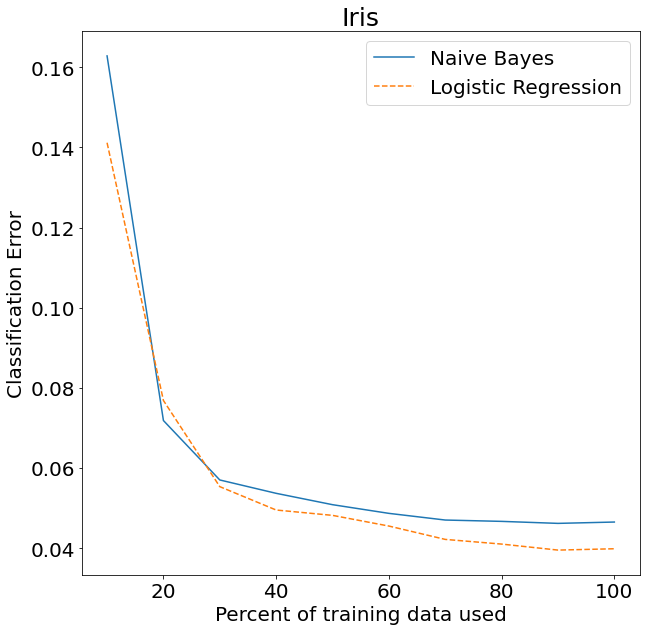

In [13]:
import warnings
warnings.filterwarnings('ignore')


# TODO: insert your code for experiments
###################################################
##### OUR CODE STARTS HERE #######################
###################################################

from sklearn.datasets import load_iris
import pandas as pd
from sklearn.preprocessing import StandardScaler

iris_data = load_iris()

iris = pd.DataFrame(data=iris_data.data, columns=iris_data.feature_names)  # creating iris dataframe and assigning column names

iris["species"] = iris_data.target  # joining target column to the main dataframe

X = iris.values[:,:-1]
y = iris.values[:,-1]


# unique classes and num of items in each class
yClass, yClass_counts = np.unique(y, return_counts=True)


nbc = NBC(feature_types=['r','r','r','r'], yClass = yClass, yClass_counts = yClass_counts)
lr = LogisticRegression(random_state=10)

tst_errs_nbc, tst_errs_lr = compareNBCvsLR(nbc, lr, X, y, num_runs=200, num_splits=10)

makePlot(tst_errs_nbc, tst_errs_lr, title='Iris', num_splits=10)

###################################################
##### OUR CODE ENDS HERE #########################
###################################################

###  <b>Data cleaning:</b> <br>
   For 'Iris' dataset preparation the following steps were done:<br>
   - Dataset has been converted to the dataframe and column names have been assigned;<br>
   - Target column has been joint to the main dataframe;<br>
   - Feature values have been standardized by removing the mean and scaling to unit variance using inbuild sklearn funcion StandardScaler().

### Observations

We observe that Naive Bayes model performs better for lower dataset size (upto 27 percent of dataset size) but Logistic regression eventually catches up and overtakes Naive Bayes model performance wise (from 27 to 100 percent of dataset size). We also deduce that both models converge towards the same error, but error for Logistic regression is slightly lower than Naive Bayes. 

**Dataset 2: Voting Dataset**

https://archive.ics.uci.edu/ml/datasets/congressional+voting+records
The logistic regression line meets the naive bayes line early in the plot. To see it clearer, you should use only 100 data points from the dataset for this experiment.

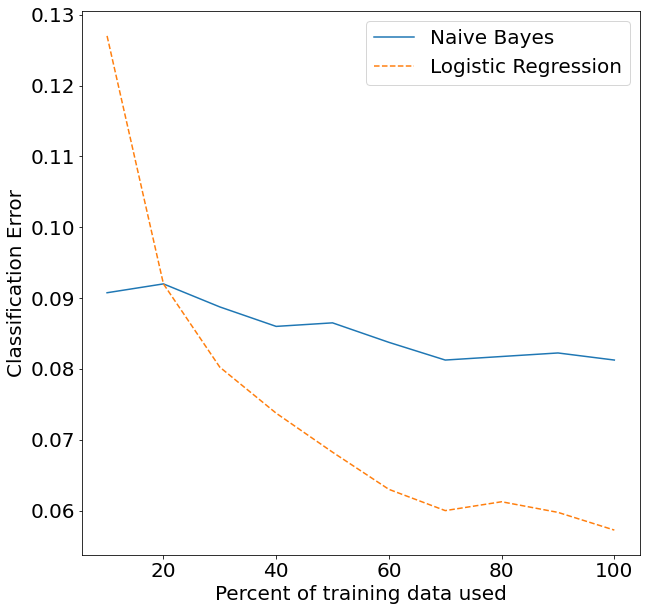

In [14]:


from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import BernoulliNB

# load the dataset
# TODO: insert your code for experiments
###################################################
##### OUR CODE STARTS HERE #######################
###################################################


labelencoder = LabelEncoder()

voting = pd.read_csv('data/voting.csv')
voting = pd.DataFrame(voting)
voting = voting.dropna()                #droping NaN values as we will only need to use 100 datapoints
voting = voting.sample(n=100)           #selecting 100 random datapoints
voting = voting.reset_index(drop=True)  #reseting indexes

X = voting.drop(['label'], axis=1)      #dropping 'label' column and converting categorical feature data to binary 
X = X.apply(lambda c: c.replace(to_replace = "y", value = 1), axis=1)
X = X.apply(lambda c: c.replace(to_replace = "n", value = 0), axis=1)
X = X.values                            #converting dataframe to array


y = labelencoder.fit_transform(voting['label'])

# unique classes and num of items in each class
yClass, yClass_counts = np.unique(y, return_counts=True)

nbc = NBC(feature_types=['b'] * 16, yClass = yClass, yClass_counts = yClass_counts)
lr = LogisticRegression()


tst_errs_nbc, tst_errs_lr = compareNBCvsLR(nbc, lr, X, y, num_runs=200, num_splits=10)
makePlot(tst_errs_nbc, tst_errs_lr, title=None, num_splits=10)


###################################################
##### OUR CODE ENDS HERE #########################
###################################################

### <b>Data cleaning</b> <p>
   For 'Voting' dataset preparation the following steps were done:<br>
    <li> Rows having NaN values have been dropped (as only 100 datapoints are required for training and testing the models);<br>
    <li> 100 datapoints were randomly selected and new dataframe built out of them; <br>
    <li> Categorical feature variables were converted into binary values, replacing 'yes' values to 1 and 'no' to 0;<br>
    <li> Target column y values (categorical values) were converted to values 0 and 1 using LabelEncoder(). <br>
    No scaling was required as datapoints are binary.

### Observations

We observe that Naive Bayes model performs better for lower dataset size (for around 20 percent of dataset size) but Logistic regression performs much better than Naive Bayes model (from 20 percent of dataset size). We also deduce that the error difference between both models is noticeable and Logistic regression performs better than Naive Bayes model.

### Thank you!